In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

df = pd.read_csv('laba4_ds.csv', index_col='Date', parse_dates=True)
df.fillna(0, inplace=True)
df = df.astype({'Fremont Bridge Total': int, 'Fremont Bridge East Sidewalk': int, 'Fremont Bridge West Sidewalk': int})
df.columns = ['total', 'east', 'west']
df.head(5)

,total,east,west
Date,,,
2012-10-03 00:00:00,13,4,9
2012-10-03 01:00:00,10,4,6
2012-10-03 02:00:00,2,1,1
2012-10-03 03:00:00,5,2,3
2012-10-03 04:00:00,7,6,1


In [ ]:
#parse_dates=['date']  - чтобы не было обьектом дата 

In [18]:
pivoted = df.pivot_table(['east', 'west'],
                           index=df.index.date,
                           columns=df.index.hour,
                           fill_value=0)
arr = pivoted.to_numpy()
print(arr.shape)
arr

(2585, 48)


array([[ 4,  4,  1, ..., 38, 25, 12],
       [ 7,  3,  3, ..., 39, 21, 30],
       [ 4,  4,  4, ..., 31, 26, 16],
       ...,
       [ 1,  1,  0, ..., 35, 21,  5],
       [ 2,  4,  0, ..., 46, 15, 13],
       [ 2,  0,  0, ..., 25, 18, 12]])

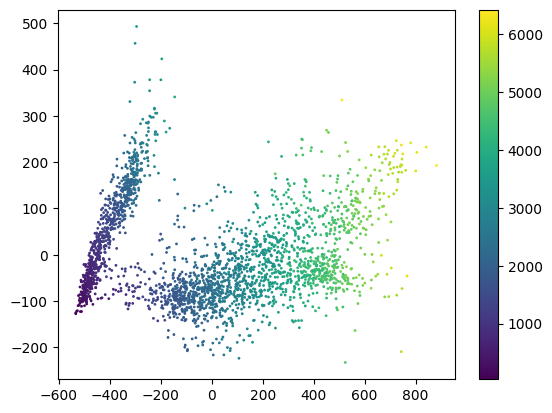

In [19]:
data = PCA(2).fit_transform(arr)

total = arr.sum(1)
plt.scatter(data[:, 0], data[:, 1], c=total, s=1)
plt.colorbar();

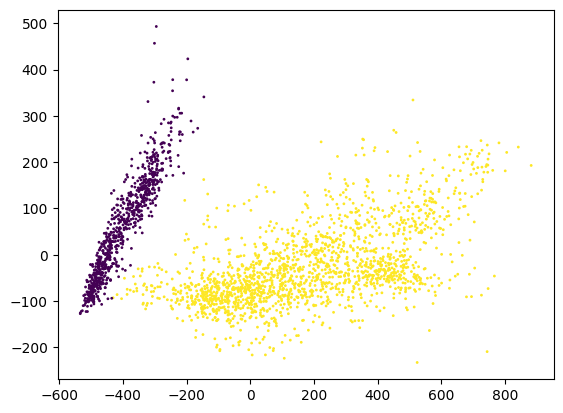

In [20]:
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=0)

# обучаем модель на данных
gmm.fit(data)

labels = gmm.predict(data) #Гаусово моделирование
plt.scatter(data[:, 0], data[:, 1], c=labels, s=1);

/var/folders/n7/vl8t4cvn0w5f3kjmykhhf6nc0000gn/T/ipykernel_33847/2681206855.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('jet', 7), s=1)


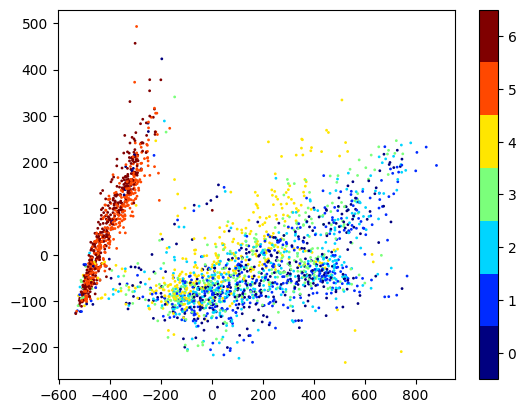

In [23]:
dayofweek = pd.to_datetime(pivoted.index).dayofweek   #достаем неделю
plt.scatter(data[:, 0], data[:, 1], c=dayofweek,
            cmap=plt.cm.get_cmap('jet', 7), s=1)
cb = plt.colorbar(ticks=range(7))
plt.clim(-0.5, 6.5);

In [29]:
results = pd.DataFrame({'cluster': labels,
                        'is_weekend': (dayofweek > 4),
                        'weekday': pivoted.index.map(lambda x: x.strftime('%a'))},
                       index=pivoted.index).query('cluster == 1 and not is_weekend').sort_index()
results.head(-15)
results.value_counts()

cluster  is_weekend  weekday
1        False       Wed        366
                     Tue        360
                     Thu        357
                     Fri        353
                     Mon        344
dtype: int64

In [30]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016', return_name=True)
holidays.head(15)

2012-01-02                         New Year's Day
2012-01-16    Birthday of Martin Luther King, Jr.
2012-02-20                  Washington’s Birthday
2012-05-28                           Memorial Day
2012-07-04                       Independence Day
2012-09-03                              Labor Day
2012-10-08                           Columbus Day
2012-11-12                           Veterans Day
2012-11-22                       Thanksgiving Day
2012-12-25                          Christmas Day
2013-01-01                         New Year's Day
2013-01-21    Birthday of Martin Luther King, Jr.
2013-02-18                  Washington’s Birthday
2013-05-27                           Memorial Day
2013-07-04                       Independence Day
dtype: object

In [19]:
holidays.name = 'name'  # required for join
joined = results.join(holidays)
set(joined['name'])

{'Christmas Day',
 'Independence Day',
 'Labor Day',
 'Memorial Day',
 "New Year's Day",
 'Thanksgiving Day',
 nan}

In [17]:
set(holidays) - set(joined.name)

{'Birthday of Martin Luther King, Jr.',
 'Columbus Day',
 'Veterans Day',
 'Washington’s Birthday'}

In [20]:
joined.name

2012-11-22    Thanksgiving Day
2012-11-23                 NaN
2012-12-24                 NaN
2012-12-25       Christmas Day
2012-12-31                 NaN
                    ...       
2019-02-11                 NaN
2019-02-12                 NaN
2019-05-27                 NaN
2019-07-04                 NaN
2019-09-02                 NaN
Name: name, Length: 69, dtype: object

In [ ]:
#первая часть

                     Date  Fremont Bridge Total  Fremont Bridge East Sidewalk  \
0     2012-10-03 00:00:00                    13                             4   
1     2012-10-03 01:00:00                    10                             4   
2     2012-10-03 02:00:00                     2                             1   
3     2012-10-03 03:00:00                     5                             2   
4     2012-10-03 04:00:00                     7                             6   
...                   ...                   ...                           ...   
62035 2019-10-31 19:00:00                   111                            44   
62036 2019-10-31 20:00:00                    52                            17   
62037 2019-10-31 21:00:00                    41                            16   
62038 2019-10-31 22:00:00                    32                            14   
62039 2019-10-31 23:00:00                    18                             6   

       Fremont Bridge West 

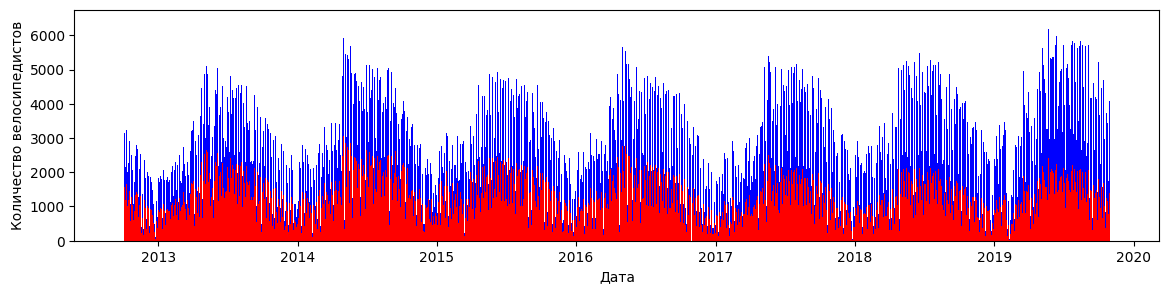

/var/folders/n7/vl8t4cvn0w5f3kjmykhhf6nc0000gn/T/ipykernel_56979/1947197754.py:47: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_means = df.groupby('year').mean()


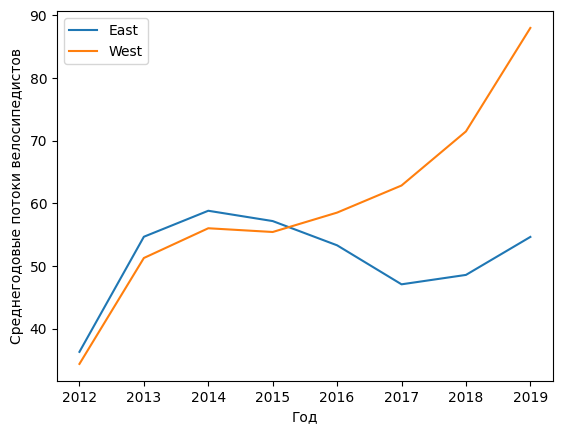

/var/folders/n7/vl8t4cvn0w5f3kjmykhhf6nc0000gn/T/ipykernel_56979/1947197754.py:62: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hourly_means = df.groupby('hour').mean()


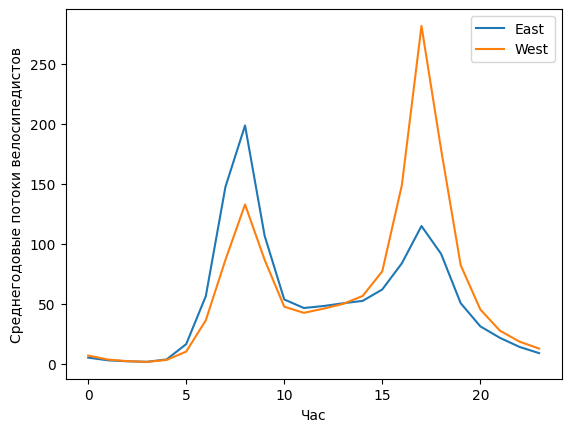

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

df = pd.read_csv('laba4_ds.csv', parse_dates=['Date'])
df = df.replace([np.inf, -np.inf, np.nan], 0)
df = df.astype({'Fremont Bridge Total': int, 'Fremont Bridge East Sidewalk': int, 'Fremont Bridge West Sidewalk': int})
# df['Date'] = pd.to_datetime(df['Date'])
print(df)
print()
print('Типы данных столбцов:')
print(df.dtypes)



# Пояснение по столбцам:

# -Дата и время с указанием конкретного часа для этой записи

# КОЛИЧЕСТВО ВЕЛОСИПЕДИСТОВ, ПРОЕХАВШИХ ЗА ТЕКУЩИЙ ЧАС:
# -Итого по мосту Фремонт
# -Восточный тротуар моста Фремонт
# -Западный тротуар Фремонт-Бридж

def t1():
    # plt.figure(figsize=(14, 4))

    x = np.array(df['Date'])[::24]
    y1 = np.array(df['Fremont Bridge East Sidewalk'])
    y2 = np.array(df['Fremont Bridge West Sidewalk'])
    y1 = [np.sum(y1[i:i+24]) for i in range(0, len(y1), 24)]
    y2 = [np.sum(y2[i:i+24]) for i in range(0, len(y2), 24)]
    fig, ax = plt.subplots()
    fig.set_size_inches(14, 3)
    ax.bar(x, y1, color='red', width=0.999)
    ax.bar(x, y2, color='blue', bottom=y1, width=0.999)

    plt.xlabel('Дата')
    plt.ylabel('Количество велосипедистов')
    plt.show()


def t2():
    df['year'] = pd.DatetimeIndex(df['Date']).year
    yearly_means = df.groupby('year').mean()

    fig, ax = plt.subplots()
    ax.plot(yearly_means.index, yearly_means['Fremont Bridge East Sidewalk'], label='East')
    ax.plot(yearly_means.index, yearly_means['Fremont Bridge West Sidewalk'], label='West')

    ax.set_xlabel('Год')
    ax.set_ylabel('Среднегодовые потоки велосипедистов')
    ax.legend()

    plt.show()


def t3():
    df['hour'] = pd.DatetimeIndex(df['Date']).hour
    hourly_means = df.groupby('hour').mean()

    fig, ax = plt.subplots()
    ax.plot(hourly_means.index, hourly_means['Fremont Bridge East Sidewalk'], label='East')
    ax.plot(hourly_means.index, hourly_means['Fremont Bridge West Sidewalk'], label='West')

    ax.set_xlabel('Час')
    ax.set_ylabel('Среднегодовые потоки велосипедистов')
    ax.legend()

    plt.show()


t1()
t2()
t3()

In [3]:
df.head(5)

,total,east,west
Date,,,
2012-10-03 00:00:00,13,4,9
2012-10-03 01:00:00,10,4,6
2012-10-03 02:00:00,2,1,1
2012-10-03 03:00:00,5,2,3
2012-10-03 04:00:00,7,6,1
